In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
from tensorflow.keras.datasets import mnist

In [20]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [21]:
X_train=X_train/255
X_test=X_test/255

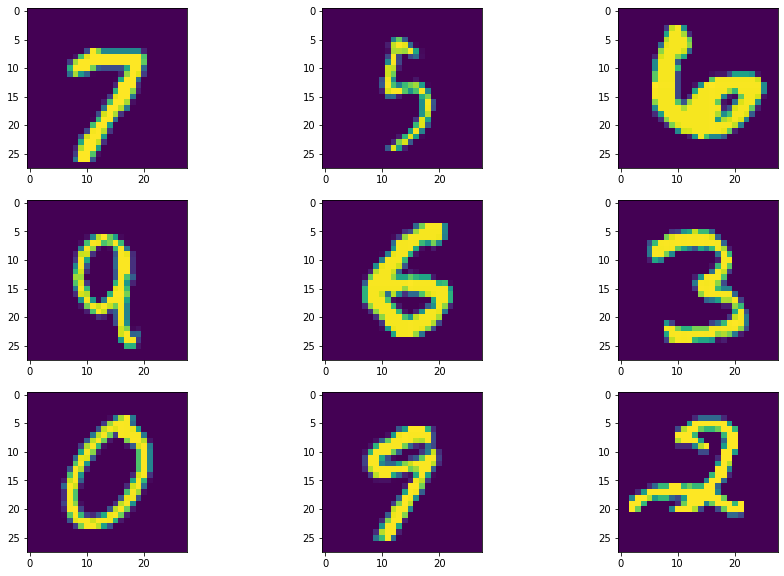

In [22]:
import random
plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[random.randint(0,50000)])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [24]:
28*28

784

In [25]:
784/2

392.0

In [26]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [27]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [28]:
autoencoder=Sequential([encoder,decoder])

In [29]:
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [30]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2512 - accuracy: 0.0861 - val_loss: 0.2135 - val_accuracy: 0.1235
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1915 - accuracy: 0.1538 - val_loss: 0.1745 - val_accuracy: 0.1756
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1648 - accuracy: 0.1914 - val_loss: 0.1587 - val_accuracy: 0.2043
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1494 - accuracy: 0.2125 - val_loss: 0.1481 - val_accuracy: 0.2120
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1426 - accuracy: 0.2210 - val_loss: 0.1397 - val_accuracy: 0.2221
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1386 - accuracy: 0.2260 - val_loss: 0.1384 - val_accuracy: 0.2325
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1357 - accuracy: 0.2306 - val_loss: 0.1377 - val_ac

In [33]:
passed_images=autoencoder.predict(X_test[:10])

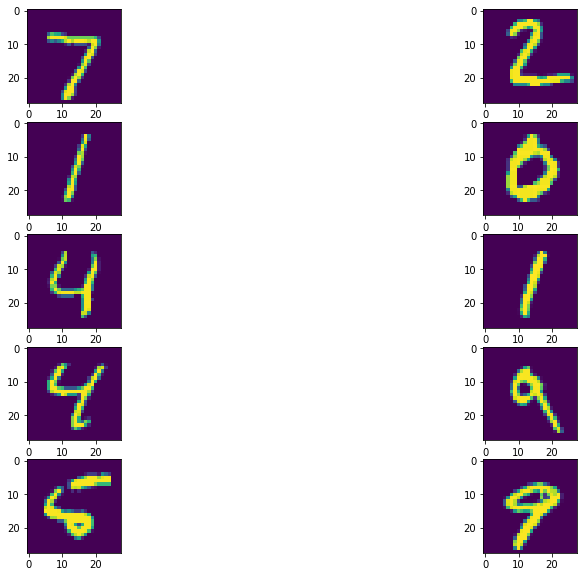

In [34]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(X_test[i])

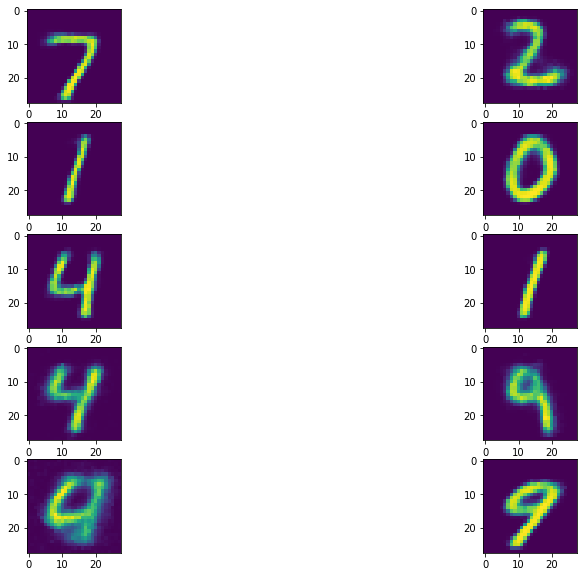

In [35]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(passed_images[i])

## Conclusion
Nous sommes passer de 784 pixels a 25 pixels

## Debruitage d'image

In [36]:
from tensorflow.keras.layers import GaussianNoise

In [38]:
sample=GaussianNoise(0.2)
noisey=sample(X_test[:10],training=True)

Originie


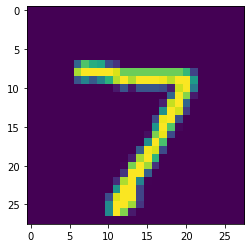

Avec du bruit


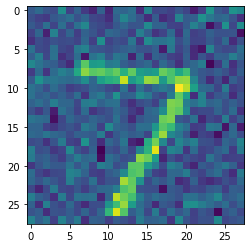

In [40]:
n=0
print("Originie")
plt.imshow(X_test[n])
plt.show()
print("Avec du bruit")
plt.imshow(noisey[n])

In [42]:
import tensorflow as tf

In [43]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [44]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [45]:
noise_remover=Sequential([encoder,decoder])

In [47]:
noise_remover.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [48]:
noise_remover.fit(X_train,X_train,validation_data=(X_test,X_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1696 - accuracy: 0.1819 - val_loss: 0.1359 - val_accuracy: 0.2234
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1294 - accuracy: 0.2341 - val_loss: 0.1205 - val_accuracy: 0.2441
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1210 - accuracy: 0.2484 - val_loss: 0.1138 - val_accuracy: 0.2513
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1164 - accuracy: 0.2559 - val_loss: 0.1105 - val_accuracy: 0.2582
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1129 - accuracy: 0.2615 - val_loss: 0.1073 - val_accuracy: 0.2679
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1101 - accuracy: 0.2660 - val_loss: 0.1055 - val_accuracy: 0.2688
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1082 - accuracy: 0.2695 - val_loss: 0.1041 - val_ac

In [49]:
ten_noise_images=sample(X_test[:10],training=True)

In [50]:
denoiser=noise_remover(ten_noise_images_noise_images)

Origine


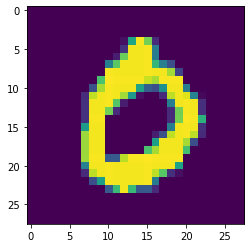

IMage avec bruit


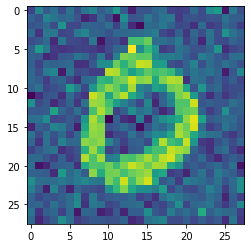

Image sans bruit


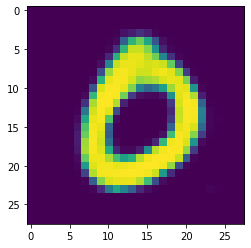

In [52]:
n=3
print("Origine")
plt.imshow(X_test[n])
plt.show()
print("IMage avec bruit")
plt.imshow(ten_noise_images[n])
plt.show()
print("Image sans bruit")
plt.imshow(denoiser[n])
plt.show()